In [35]:
import os, sys
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from sklearn.cluster import KMeans 
# image recognition
import cv2

In [36]:
path = "../Processed_images/C_spergularina_lph133_A16_LD_1778_14_step2.contour_data.pkl"
DF = pandas.read_pickle(path)
contour = DF["contour"]

In [52]:
DF = pandas.read_pickle(path)
contour = DF["contour"]
image_name = DF["image"][0]
image_path = os.path.join("../Data/C3_images/",image_name)
image = cv2.imread(image_path)

KeyError: 'image'

In [47]:
properties = np.zeros((4,len(contour)))
for i in range(len(contour)):
    x,y,w,h = cv2.boundingRect(contour[i])
    area = cv2.contourArea(contour[i])
    hull = cv2.convexHull(contour[i])
    hull_area = cv2.contourArea(hull)
    (x_elli,y_elli),(MA,ma),angle = cv2.fitEllipse(contour[i])
    
    properties[0,i] = float(max(w,h))/min(w,h) #aspect ratio
    properties[1,i] = float(area)/float(w*h) #extent
    properties[2,i] = float(area)/hull_area # solidity
    properties[3,i] = np.sqrt(4*area/np.pi)
    
    


(array([235., 104.,  47.,  21.,   7.,   4.,   4.,   1.,   0.,   2.]),
 array([1.        , 1.28181818, 1.56363636, 1.84545455, 2.12727273,
        2.40909091, 2.69090909, 2.97272727, 3.25454545, 3.53636364,
        3.81818182]),
 <a list of 10 Patch objects>)

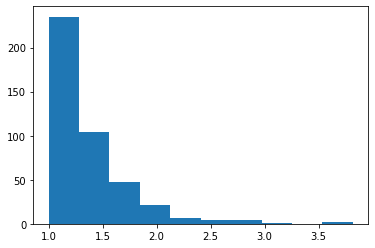

In [48]:
plt.hist(properties[0,:])

(array([ 8.,  9., 19., 31., 49., 56., 63., 84., 81., 25.]),
 array([0.1581241 , 0.22063063, 0.28313716, 0.34564369, 0.40815022,
        0.47065675, 0.53316328, 0.59566981, 0.65817634, 0.72068287,
        0.7831894 ]),
 <a list of 10 Patch objects>)

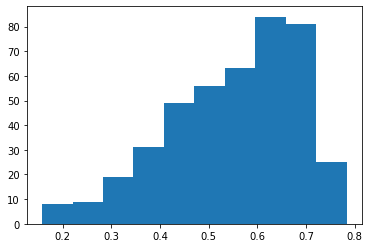

In [49]:
plt.hist(properties[1,:])


(array([  3.,   5.,   8.,  18.,  24.,  32.,  35.,  64., 127., 109.]),
 array([0.31568528, 0.38379952, 0.45191375, 0.52002799, 0.58814222,
        0.65625646, 0.72437069, 0.79248493, 0.86059916, 0.9287134 ,
        0.99682763]),
 <a list of 10 Patch objects>)

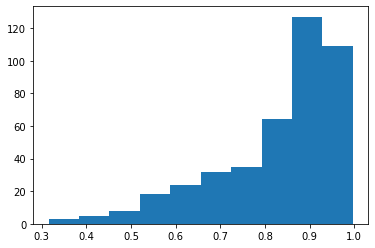

In [50]:
plt.hist(properties[2,:])

(array([146.,  86.,  95.,  48.,  26.,  14.,   6.,   3.,   0.,   1.]),
 array([ 25.46989494,  59.96417521,  94.45845548, 128.95273575,
        163.44701602, 197.94129629, 232.43557656, 266.92985684,
        301.42413711, 335.91841738, 370.41269765]),
 <a list of 10 Patch objects>)

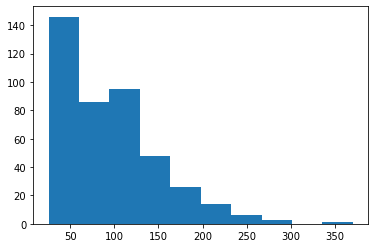

In [42]:
plt.hist(properties[3,:])

In [43]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(properties)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

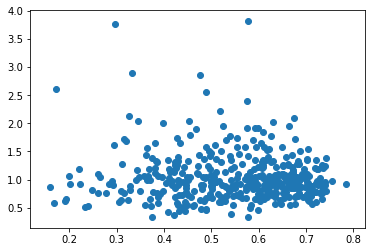

In [45]:
plt.scatter(properties[1,:], properties[0,:])

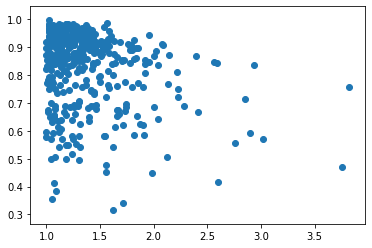

In [51]:
plt.scatter(properties[0,:], properties[2,:])

In [ ]:
plt.scatter(properties[1,:], properties[0,:])